In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import sys
print(sys.version)

3.10.12 (main, Nov  6 2024, 20:22:13) [GCC 11.4.0]


In [3]:
!pip install python-Levenshtein
!pip install sklearn
!pip install pyLDAvis
!pip install gensim pyldavis
!pip install preprocessor
!pip install rake-nltk
!pip install umap-learn
!pip install matplotlib
!pip install seaborn
!pip install nltk
!pip install --upgrade ipykernel
!pip install emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 32.0 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 24.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for preprocessor: filename=preprocessor-1.1.3-py3-none-any.whl size=4473 sha256=75c4827beba286e7bbc4cae3ed0295fe0b60d8d32f666aa70a8006279987a667
  Stored in directory: /root/.cache/pip/wheels/b6/26/c1/ce3fdf93e63c11019da18db

In [ ]:
import warnings
import pandas as pd
import numpy as np
import io

import tweepy
import csv
import preprocessor as p

import string
import math

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

from wordcloud import WordCloud

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.probability import FreqDist

from pprint import pprint
import spacy

import gensim
import gensim.corpora as corpora
from gensim.corpora import Dictionary
from gensim.models.ldamodel import LdaModel
from gensim.models import LdaMulticore,Word2Vec, FastText, CoherenceModel, LdaModel

import numpy as np
import matplotlib.pyplot as plt

import sklearn
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.spatial.distance import pdist, squareform
from scipy.spatial.distance import cosine

from matplotlib import pyplot as plt
import plotly.graph_objects as go

import pickle
from tqdm import tqdm

import re
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

from rake_nltk import Rake


import umap
from umap import UMAP
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap, Normalize
from matplotlib.colorbar import ColorbarBase

import nltk
nltk.download()
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
import emoji

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  def _forward_input(self, allow_stdin=False):


NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------

Download which package (l=list; x=cancel)?
Packages:
  [ ] abc................. Australian Broadcasting Commission 2006
  [ ] alpino.............. Alpino Dutch Treebank
  [ ] averaged_perceptron_tagger Averaged Perceptron Tagger
  [ ] averaged_perceptron_tagger_eng Averaged Perceptron Tagger (JSON)
  [ ] averaged_perceptron_tagger_ru Averaged Perceptron Tagger (Russian)
  [ ] averaged_perceptron_tagger_rus Averaged Perceptron Tagger (Russian)
  [ ] basque_grammars..... Grammars for Basque
  [ ] bcp47............... BCP-47 Language Tags
  [ ] biocreative_ppi..... BioCreAtIvE (Critical Assessment of Information
                           Extraction Systems in Biology)
  [ ] bllip_wsj_no_aux.... BLLIP Parser: WSJ Model
  [ ] book_grammars....... Grammar

       | 
       | Downloading package abc to /root/nltk_data...
       |   Unzipping corpora/abc.zip.
       | Downloading package alpino to /root/nltk_data...
       |   Unzipping corpora/alpino.zip.
       | Downloading package averaged_perceptron_tagger to
       |     /root/nltk_data...
       |   Unzipping taggers/averaged_perceptron_tagger.zip.
       | Downloading package averaged_perceptron_tagger_eng to
       |     /root/nltk_data...
       |   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
       | Downloading package averaged_perceptron_tagger_ru to
       |     /root/nltk_data...
       |   Unzipping taggers/averaged_perceptron_tagger_ru.zip.
       | Downloading package averaged_perceptron_tagger_rus to
       |     /root/nltk_data...
       |   Unzipping taggers/averaged_perceptron_tagger_rus.zip.
       | Downloading package basque_grammars to /root/nltk_data...
       |   Unzipping grammars/basque_grammars.zip.
       | Downloading package bcp47 to /root/nltk_d


---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------


## 1. Text pre-processing

In [5]:
df = pd.read_csv("/content/drive/MyDrive/Data/NFT/UFCST012322_021823_3445.csv")
#removing unwanted columns for this analysis
#df.drop(columns = ['id', 'created_at', 'author_id','in_reply_to_user_id', 'lang', 'author', 'entities', 'referenced_tweets', 'media', 'geo'], inplace = True)
print(df.text)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  def _forward_input(self, allow_stdin=False):


0       Share new Twitch clips on a Discord channel\n\...
1       @jlahoff @DKReignmakers This is for @UFCStrike...
2       The  UFC Vegas 69 Challenges are LIVE!\n\nIt's...
3       @flowscorenft @Jun888king @MuzaHawk @PlayGamis...
4       @TwrecksIsComing @Jun888king @MuzaHawk @PlayGa...
                              ...                        
3440    Who’s ready for the very first #NFT drop in UF...
3441    UFC Strike friends - how is this man an underd...
3442    buying my first NFTs tomorrow! thanks UFC! #UF...
3443    Nine Lives Lounge. The gift that keeps on givi...
3444    @cryptojimbo1 Join the Pack Drop waiting room,...
Name: text, Length: 3445, dtype: object


In [6]:
# Initialize tokenizer and spaCy model
tokenizer = TweetTokenizer()
nlp = spacy.load('en_core_web_sm')

# Example contractions dictionary
contractions = {
    "idk": "i do not know",
    "imho": "in my humble opinion",
    "lol": "laughing out loud",
    "u": "you",
    "r": "are",
    "wanna": "want to",
    "gonna": "going to",
    "btw": "by the way",
    "tbh": "to be honest",
    "omg": "oh my god",
    "brb": "be right back",
    "bff": "best friends forever",
    "i'm": "i am",
    "i’m": "i am",  # Added this line to handle different apostrophe
    "you're": "you are",
    "you’re": "you are",  # Added this line to handle different apostrophe
    "they're": "they are",
    "they’re": "they are",  # Added this line to handle different apostrophe
    "it's": "it is",
    "it’s": "it is",  # Added this line to handle different apostrophe
    "we're": "we are",
    "we’re": "we are",  # Added this line to handle different apostrophe
    "isn't": "is not",
    "isn’t": "is not",  # Added this line to handle different apostrophe
    "don't": "do not",
    "don’t": "do not",  # Added this line to handle different apostrophe
    "can't": "cannot",
    "can’t": "cannot",  # Added this line to handle different apostrophe
    "won't": "will not",
    "won’t": "will not",  # Added this line to handle different apostrophe
    "doesn't": "does not",
    "doesn’t": "does not",  # Added this line to handle different apostrophe
    "i've": "i have",
    "i’ve": "i have",  # Added this line to handle different apostrophe
    "you've": "you have",
    "you’ve": "you have",  # Added this line to handle different apostrophe
    "we've": "we have",
    "we’ve": "we have",  # Added this line to handle different apostrophe
    "they've": "they have",
    "they’ve": "they have",  # Added this line to handle different apostrophe
    "i'll": "i will",
    "i’ll": "i will",  # Added this line to handle different apostrophe
    "you'll": "you will",
    "you’ll": "you will",  # Added this line to handle different apostrophe
    "they'll": "they will",
    "they’ll": "they will",  # Added this line to handle different apostrophe
    "i'd": "i would",
    "i’d": "i would",  # Added this line to handle different apostrophe
    "you'd": "you would",
    "you’d": "you would",  # Added this line to handle different apostrophe
    "they'd": "they would",
    "they’d": "they would",  # Added this line to handle different apostrophe
    "he's": "he is",
    "he’s": "he is",  # Added this line to handle different apostrophe
    "she's": "she is",
    "she’s": "she is",  # Added this line to handle different apostrophe
    "that's": "that is",
    "that’s": "that is",  # Added this line to handle different apostrophe
    "there's": "there is",
    "there’s": "there is",  # Added this line to handle different apostrophe
    "who's": "who is",
    "who’s": "who is",  # Added this line to handle different apostrophe
    "let's": "let us",
    "let’s": "let us",  # Added this line to handle different apostrophe
}

# Create a set of stopwords including contraction keys and their expansions
nltk_stopwords = set(stopwords.words('english'))
twitter_stopwords = {"rt", "t.co", "fav", "follow", "amp", "retw", "retweet", "w/", "w"}  # Common Twitter-specific words
custom_stopwords = set(contractions.keys())  # Add contraction keys
for contraction in contractions.values():
    custom_stopwords.update(contraction.split())  # Add expanded contraction words

# Add to custom stopwords
custom_stopwords.update(["ufc", "ufcstrike", "strike", "nft", "nfts", "ufcnft",
                         "itsalmosttime", "babbyy", "andnew", "queueueue", "broo"])

# Combine all stopwords
all_stopwords = nltk_stopwords.union(twitter_stopwords).union(custom_stopwords)

# Initialize TweetTokenizer for better handling of social media text
tokenizer = TweetTokenizer()

# Preprocessing function
def preprocess_twitter_text(text):
    # Lowercase the text
    text = text.lower()

    # Replace contractions
    for key, value in contractions.items():
        text = re.sub(r'\b' + re.escape(key) + r'\b', value, text)

    # Remove specific terms like "49ers" before tokenization
    #text = re.sub(r'\b49ers\b', '', text)  # Remove "49ers" completely
    #text = re.sub(r'\b49er\b', '', text)  # Remove "49er" completely

    # Remove URLs and replace with empty string
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)

    # Remove user mentions
    text = re.sub(r'@\w+', '', text)

    # Remove hashtags (keep only the word part)
    text = re.sub(r'#(\w+)', r'\1', text)

    # Remove numbers
    text = re.sub(r'\d+', '', text)

    # Remove emojis and their text representations
    text = re.sub(r'[^\w\s,]', '', text)  # Remove actual emoji characters
    text = re.sub(r':\w+:', '', text)     # Remove emoji descriptions (e.g., ":thinking_face:")

    # Remove underscores
    text = re.sub(r'_', ' ', text)  # Replace underscores with spaces to normalize compound words

    # Remove non-English characters
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)

    # Normalize repeated characters (e.g., "soooo" -> "soo")
    text = re.sub(r'(.)\1+', r'\1\1', text)

    # Tokenize the text
    tokens = tokenizer.tokenize(text)

    # Remove stopwords
    tokens = [token for token in tokens if token not in all_stopwords]

    # Lemmatize the tokens using spaCy
    doc = nlp(" ".join(tokens))
    lemmatized_tokens = [token.lemma_ for token in doc]

    return lemmatized_tokens

# Example usage
example_tweet = "The UFC Vegas 68 Challenge ends tomorrow at 11AM PT! Here are the numbers with &lt;24 hours to go...Level 1: 830 Collectors on track to earn a Pack! Level 2: 407 Collectors on track to earn this UFC Debut (ft. @Malhadinho_UFC) 몙 https://t.co/OkaXqZegeO https://t.co/lf6wq96caX"
tokenized_tweet = preprocess_twitter_text(example_tweet)
print(tokenized_tweet)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  def _forward_input(self, allow_stdin=False):


['vegas', 'challenge', 'end', 'tomorrow', 'pt', 'number', 'lt', 'hour', 'golevel', 'collector', 'track', 'earn', 'pack', 'level', 'collector', 'track', 'earn', 'debut', 'ft']


In [7]:
# Apply preprocessing and tokenization to each comment
df['tokenized_text'] = df['text'].apply(lambda x: preprocess_twitter_text(str(x)))

# Extract the tokenized text into a separate variable if needed
data_ready = df['tokenized_text']

# Print the tokenized output
print(data_ready)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  def _forward_input(self, allow_stdin=False):


0       [share, new, twitch, clip, discord, channel, f...
1                                [heres, challenge, link]
2       [vegas, challenge, live, return, burn, tool, e...
3                                                 [agree]
4       [moment, collection, make, collector, get, onf...
                              ...                        
3440    [ready, first, drop, history, drop, tomorrow, ...
3441                             [man, underdog, tonight]
3442                        [buy, first, tomorrow, thank]
3443          [nine, live, lounge, gift, keep, give, nll]
3444    [join, pack, drop, waiting, room, around, minu...
Name: tokenized_text, Length: 3445, dtype: object


## 3. LDA


###Coherence Score

In [8]:
#Creating a Bag Of Words
from gensim.corpora import Dictionary

# Assuming 'documents' is a list of tokenized documents
text_dict = Dictionary(data_ready)
corpus = [text_dict.doc2bow(doc) for doc in data_ready]

#view integer mappings
text_dict.token2id


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  def _forward_input(self, allow_stdin=False):


{'abundanceinmiracle': 0,
 'automation': 1,
 'careday': 2,
 'channel': 3,
 'clip': 4,
 'danilithnokerekoerse': 5,
 'discord': 6,
 'encrynatcoinex': 7,
 'financial': 8,
 'free': 9,
 'isekai': 10,
 'iworkamfam': 11,
 'new': 12,
 'pba': 13,
 'philadelphiaeagle': 14,
 'share': 15,
 'syria': 16,
 'template': 17,
 'twitch': 18,
 'ugx': 19,
 'upa': 20,
 'womensclothe': 21,
 'challenge': 22,
 'heres': 23,
 'link': 24,
 'burn': 25,
 'collection': 26,
 'earn': 27,
 'event': 28,
 'exclusive': 29,
 'firstever': 30,
 'focus': 31,
 'get': 32,
 'live': 33,
 'main': 34,
 'moment': 35,
 'owntheglory': 36,
 'plus': 37,
 'return': 38,
 'reward': 39,
 'tool': 40,
 'ufcvegas': 41,
 'vegas': 42,
 'agree': 43,
 'collector': 44,
 'make': 45,
 'onflowscore': 46,
 'rank': 47,
 'check': 48,
 'challenger': 49,
 'completion': 50,
 'daniel': 51,
 'detail': 52,
 'easy': 53,
 'end': 54,
 'far': 55,
 'first': 56,
 'hard': 57,
 'hooker': 58,
 'number': 59,
 'tomorrow': 60,
 'win': 61,
 'ama': 62,
 'announce': 63,
 'car

In [9]:
# Function to compute coherence values for different numbers of topics
def compute_coherence_values(corpus, dictionary, k_min, k_max, step=1):
    coherence_values = []
    topic_nums = list(range(k_min, k_max + 1, step))

    for num_topics in topic_nums:
        lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, random_state=42)
        coherence_model_lda = CoherenceModel(model=lda_model, texts=data_ready, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherence_model_lda.get_coherence())

    return topic_nums, coherence_values

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  def _forward_input(self, allow_stdin=False):


In [10]:
# Determine the optimal number of topics
k_min, k_max, step = 2, 20, 1
topic_nums, coherence_values = compute_coherence_values(corpus, text_dict, k_min, k_max, step)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  def _forward_input(self, allow_stdin=False):


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  def _forward_input(self, allow_stdin=False):


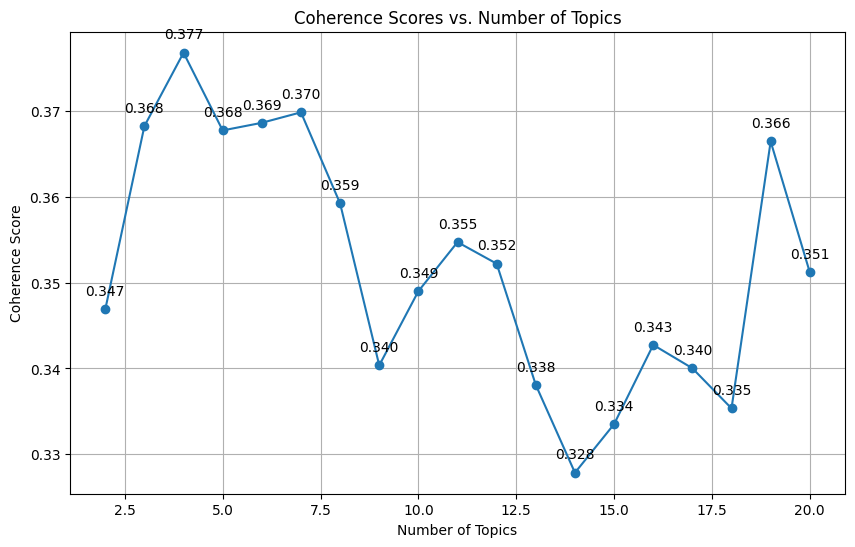

Optimal number of topics: 4


In [11]:
# Plot coherence score
plt.figure(figsize=(10, 6))
plt.plot(topic_nums, coherence_values, marker='o')
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("Coherence Scores vs. Number of Topics")
plt.grid()

# Annotate each point with its coherence score
for i, txt in enumerate(coherence_values):
    plt.annotate(f"{txt:.3f}", (topic_nums[i], coherence_values[i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.show()

optimal_num_topics = topic_nums[np.argmax(coherence_values)]
print(f"Optimal number of topics: {optimal_num_topics}")

###LDA Modeling

In [12]:
#Fitting the LDA Model
from gensim.models.ldamodel import LdaModel

# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=text_dict,
                                           num_topics=4,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=10,
                                           passes=10,
                                           alpha='symmetric',
                                           iterations=100,
                                           per_word_topics=True)

pprint(lda_model.print_topics())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  def _forward_input(self, allow_stdin=False):


[(0,
  '0.055*"today" + 0.041*"dapper" + 0.031*"pull" + 0.027*"look" + 0.023*"buy" '
  '+ 0.022*"dapperlab" + 0.022*"anyone" + 0.018*"nftdrop" + 0.014*"thank" + '
  '0.014*"else"'),
 (1,
  '0.105*"pack" + 0.072*"drop" + 0.056*"get" + 0.034*"queue" + 0.017*"go" + '
  '0.014*"like" + 0.013*"wait" + 0.012*"pm" + 0.012*"one" + 0.011*"check"'),
 (2,
  '0.030*"see" + 0.030*"fight" + 0.027*"live" + 0.023*"time" + 0.017*"k" + '
  '0.016*"around" + 0.014*"new" + 0.012*"tonight" + 0.012*"real" + '
  '0.011*"mma"'),
 (3,
  '0.083*"first" + 0.048*"moment" + 0.047*"tomorrow" + 0.028*"get" + '
  '0.020*"mint" + 0.016*"pt" + 0.014*"card" + 0.013*"ready" + 0.013*"hope" + '
  '0.012*"owntheglory"')]


In [13]:
def save_pkl(path, data) :
  '''
  params
  path: "filename.pkl" -- change filename(the saving location)
  data: data you want to save
  '''
  with open(path, 'wb') as f :
    pickle.dump(data, f)

  return "Save success at {}".format(path)

def load_pkl(path) :

  '''
  path: loacation for saved pickle file
  '''

  with open(path, 'rb') as f:
    data = pickle.load(f)

  return data

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  def _forward_input(self, allow_stdin=False):


In [14]:
#assign to each document
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=data_ready):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in tqdm(enumerate(ldamodel[corpus])):
        row = row_list[0] if ldamodel.per_word_topics else row_list
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                #sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)

                temp_to_append = pd.DataFrame({'Dominant_Topic':[int(topic_num)], 'Perc_Contribution': [round(prop_topic,4)],
                                               'Topic_Keywords':[topic_keywords]})
                #print(temp_to_append)
                sent_topics_df = pd.concat([sent_topics_df, temp_to_append], ignore_index=False)
                #print(sent_topics_df)

            else:
                break
    print(sent_topics_df.head(10))
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    #with open('sent_topic_df.pkl', 'wb') as f:
    #  pickle.dump(sent_topics_df,f)
    # Add original text to the end of the output
    #contents = list(texts)
    text_temp_df = pd.DataFrame({'Text': list(data_ready)})
    sent_topics_df = sent_topics_df.reset_index(drop=True)
    sent_topics_df = pd.concat([sent_topics_df, text_temp_df], axis=1, ignore_index = False)

    return(sent_topics_df)


#df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data_ready)
df_dominant_topic = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data_ready)


# Format
#df_dominant_topic = df_topic_sents_keywords.reset_index()
#df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)
save_pkl("/content/drive/MyDrive/Data/NFT/df_dominant_topic_UFCST.pkl", df_dominant_topic)



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  def _forward_input(self, allow_stdin=False):
3445it [00:04, 704.28it/s]


   Dominant_Topic  Perc_Contribution  \
0               0             0.5742   
0               3             0.8069   
0               3             0.8290   
0               2             0.5850   
0               3             0.9301   
0               1             0.6250   
0               0             0.2500   
0               3             0.9651   
0               2             0.7749   
0               3             0.4242   

                                      Topic_Keywords  
0  today, dapper, pull, look, buy, dapperlab, any...  
0  first, moment, tomorrow, get, mint, pt, card, ...  
0  first, moment, tomorrow, get, mint, pt, card, ...  
0  see, fight, live, time, k, around, new, tonigh...  
0  first, moment, tomorrow, get, mint, pt, card, ...  
0  pack, drop, get, queue, go, like, wait, pm, on...  
0  today, dapper, pull, look, buy, dapperlab, any...  
0  first, moment, tomorrow, get, mint, pt, card, ...  
0  see, fight, live, time, k, around, new, tonigh...  
0  first,

'Save success at /content/drive/MyDrive/Data/NFT/df_dominant_topic_UFCST.pkl'

In [15]:
df_dominant_topic.to_csv('/content/drive/My Drive/Data/NFT/UFCST_Twitter.csv', index=False)
data = load_pkl("/content/drive/MyDrive/Data/NFT/df_dominant_topic_UFCST.pkl")
data

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  def _forward_input(self, allow_stdin=False):


,Dominant_Topic,Perc_Contribution,Topic_Keywords,Text
0,0,0.5742,"today, dapper, pull, look, buy, dapperlab, any...","[share, new, twitch, clip, discord, channel, f..."
1,3,0.8069,"first, moment, tomorrow, get, mint, pt, card, ...","[heres, challenge, link]"
2,3,0.8290,"first, moment, tomorrow, get, mint, pt, card, ...","[vegas, challenge, live, return, burn, tool, e..."
3,2,0.5850,"see, fight, live, time, k, around, new, tonigh...",[agree]
4,3,0.9301,"first, moment, tomorrow, get, mint, pt, card, ...","[moment, collection, make, collector, get, onf..."
...,...,...,...,...
3440,3,0.4479,"first, moment, tomorrow, get, mint, pt, card, ...","[ready, first, drop, history, drop, tomorrow, ..."
3441,2,0.5584,"see, fight, live, time, k, around, new, tonigh...","[man, underdog, tonight]"
3442,0,0.4500,"today, dapper, pull, look, buy, dapperlab, any...","[buy, first, tomorrow, thank]"
3443,0,0.7425,"today, dapper, pull, look, buy, dapperlab, any...","[nine, live, lounge, gift, keep, give, nll]"


In [16]:
sent_topics_outdf_grpd = df_dominant_topic.groupby('Dominant_Topic')
sent_topics_outdf_grpd
for i, grp in sent_topics_outdf_grpd:
  print(i, grp)

0       Dominant_Topic  Perc_Contribution  \
0                  0             0.5742   
6                  0             0.2500   
23                 0             0.3796   
24                 0             0.4870   
28                 0             0.6114   
...              ...                ...   
3433               0             0.6249   
3435               0             0.5385   
3436               0             0.6980   
3442               0             0.4500   
3443               0             0.7425   

                                         Topic_Keywords  \
0     today, dapper, pull, look, buy, dapperlab, any...   
6     today, dapper, pull, look, buy, dapperlab, any...   
23    today, dapper, pull, look, buy, dapperlab, any...   
24    today, dapper, pull, look, buy, dapperlab, any...   
28    today, dapper, pull, look, buy, dapperlab, any...   
...                                                 ...   
3433  today, dapper, pull, look, buy, dapperlab, any...   
3435  tod

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  def _forward_input(self, allow_stdin=False):


In [17]:
# Display setting to show more characters in column
pd.options.display.max_colwidth = 100

sent_topics_sorteddf_mallet = pd.DataFrame()
#sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')
sent_topics_outdf_grpd = df_dominant_topic.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet,
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)],
                                            axis=0)

# Reset Index
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ["Topic_Num", "Topic_Perc_Contrib", "Keywords", "Representative Text"]

# Show
sent_topics_sorteddf_mallet.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  def _forward_input(self, allow_stdin=False):


,Topic_Num,Topic_Perc_Contrib,Keywords,Representative Text
0,0,0.9192,"today, dapper, pull, look, buy, dapperlab, anyone, nftdrop, thank, else","[well, kidhow, fe, stupid, yougo, sniff, jocks, private, dolt]"
1,1,0.9491,"pack, drop, get, queue, go, like, wait, pm, one, check","[long, term, probably, short, term, come, single, drop, couple, prolly, sweep, high, stuff, disc..."
2,2,0.9515,"see, fight, live, time, k, around, new, tonight, real, mma","[michel, pereira, weekend, ufcfightnight, youtube, twitch, michelpereira, pereira, digitalcollec..."
3,3,0.9679,"first, moment, tomorrow, get, mint, pt, card, ready, hope, owntheglory","[collection, challenge, end, tomorrow, tuesday, pt, owntheglory, rather, earn, khamzat, chimaev,..."


In [18]:
print(df_dominant_topic)
df_dominant_topic.to_csv(r'/content/drive/My Drive/Data/NFT/UFCST_Twitter.csv')

      Dominant_Topic  Perc_Contribution  \
0                  0             0.5742   
1                  3             0.8069   
2                  3             0.8290   
3                  2             0.5850   
4                  3             0.9301   
...              ...                ...   
3440               3             0.4479   
3441               2             0.5584   
3442               0             0.4500   
3443               0             0.7425   
3444               1             0.8249   

                                                               Topic_Keywords  \
0     today, dapper, pull, look, buy, dapperlab, anyone, nftdrop, thank, else   
1      first, moment, tomorrow, get, mint, pt, card, ready, hope, owntheglory   
2      first, moment, tomorrow, get, mint, pt, card, ready, hope, owntheglory   
3                  see, fight, live, time, k, around, new, tonight, real, mma   
4      first, moment, tomorrow, get, mint, pt, card, ready, hope, owntheglory 

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  def _forward_input(self, allow_stdin=False):


In [19]:
# Visualize topics with pyLDAvis
lda_display = pyLDAvis.gensim_models.prepare(lda_model, corpus, text_dict, sort_topics=False)
pyLDAvis.display(lda_display)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  def _forward_input(self, allow_stdin=False):


###Stability and Perplex Score

In [20]:
# Apply preprocessing
df['tokenized_text'] = df['text'].apply(lambda x: preprocess_twitter_text(str(x)))

# Prepare data for topic modeling (Scikit-Learn expects strings, Gensim expects tokens)
tokenized_texts = df['tokenized_text'].tolist()  # Tokenized texts as lists of tokens
data_ready_sklearn = [' '.join(tokens) for tokens in tokenized_texts]  # Joined tokens for Scikit-Learn

# Step 1: Build Scikit-Learn LDA Model with 8 Topics
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
data_vectorized = vectorizer.fit_transform(data_ready_sklearn)

lda_sklearn = LatentDirichletAllocation(n_components=8, learning_decay=0.5, random_state=42)
lda_sklearn.fit(data_vectorized)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  def _forward_input(self, allow_stdin=False):


LatentDirichletAllocation(learning_decay=0.5, n_components=8, random_state=42)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  def _forward_input(self, allow_stdin=False):


Stability for 2 topics: 0.6522385762758813
Stability for 3 topics: 0.5281897989138383
Stability for 4 topics: 0.46519001003179067
Stability for 5 topics: 0.41391373347779403
Stability for 6 topics: 0.3647849218450807
Stability score for the optimal number of topics (4): 0.46519001003179067


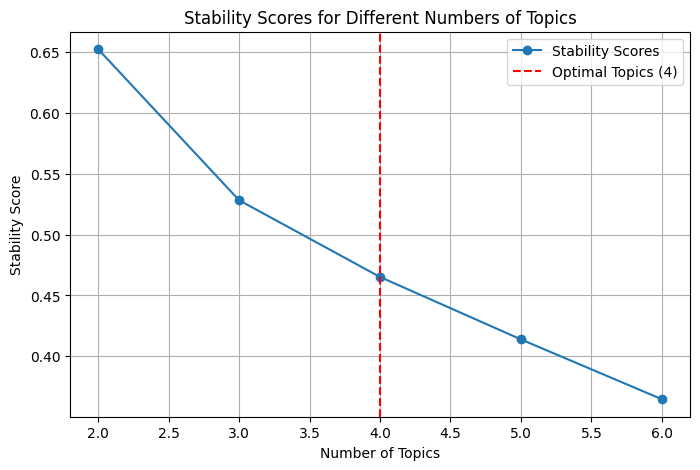

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.metrics.pairwise import cosine_similarity

# Function to calculate stability score for a given number of topics
def calculate_stability(n_components, data, n_runs=5, random_states=range(5)):
    topic_distributions = []
    for seed in random_states:
        lda_temp = LatentDirichletAllocation(n_components=n_components, random_state=seed)
        lda_temp.fit(data)
        topic_distributions.append(lda_temp.components_)

    # Compute pairwise cosine similarities between consecutive topic matrices
    pairwise_similarities = [
        cosine_similarity(a, b).mean()
        for a, b in zip(topic_distributions[:-1], topic_distributions[1:])
    ]
    # Return average stability score
    return np.mean(pairwise_similarities)

# Range of topics to evaluate (focused around the optimal number)
topic_range = range(2, 7)  # From 2 to 6 topics
stability_scores = []

# Calculate stability for each number of topics
for n_topics in topic_range:
    score = calculate_stability(n_components=n_topics, data=data_vectorized)
    stability_scores.append(score)
    print(f"Stability for {n_topics} topics: {score}")

# Specific stability for the optimal number of topics (4)
optimal_topics = 4
optimal_score = calculate_stability(n_components=optimal_topics, data=data_vectorized)
print(f"Stability score for the optimal number of topics ({optimal_topics}): {optimal_score}")

# Plot stability scores
plt.figure(figsize=(8, 5))
plt.plot(topic_range, stability_scores, marker='o', linestyle='-', label="Stability Scores")
plt.axvline(x=optimal_topics, color='red', linestyle='--', label=f"Optimal Topics ({optimal_topics})")
plt.title("Stability Scores for Different Numbers of Topics")
plt.xlabel("Number of Topics")
plt.ylabel("Stability Score")
plt.grid(True)
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  def _forward_input(self, allow_stdin=False):


Topics: 2, Perplexity: 3.694833048144749
Topics: 3, Perplexity: 5.500819500532075
Topics: 4, Perplexity: 7.302639630440579
Topics: 5, Perplexity: 9.055226494982604
Topics: 6, Perplexity: 10.776866518046404
Optimal Number of Topics: 4, Perplexity: 7.302639630440579


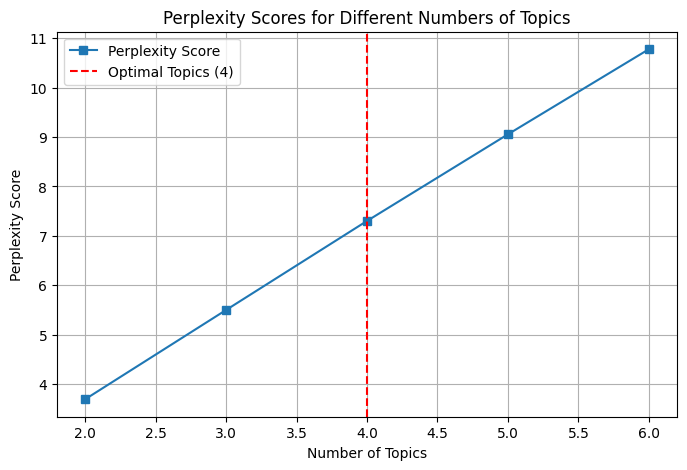

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

# Example data
data_ready_sklearn = ["sample text data", "another sample text", "more text data for LDA"]

# Vectorize data
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
data_vectorized = vectorizer.fit_transform(data_ready_sklearn)

# Function to calculate perplexity score
def calculate_perplexity(n_components, data):
    lda_temp = LatentDirichletAllocation(n_components=n_components, random_state=42)
    lda_temp.fit(data)
    return lda_temp.perplexity(data)

# Range of topics to evaluate (focused around the optimal number)
topic_range = range(2, 7)  # From 2 to 6 topics
perplexity_scores = []

# Calculate perplexity for each number of topics
for n_topics in topic_range:
    perplexity_score = calculate_perplexity(n_components=n_topics, data=data_vectorized)
    perplexity_scores.append(perplexity_score)
    print(f"Topics: {n_topics}, Perplexity: {perplexity_score}")

# Specific perplexity for the optimal number of topics
optimal_topics = 4
optimal_perplexity = calculate_perplexity(n_components=optimal_topics, data=data_vectorized)
print(f"Optimal Number of Topics: {optimal_topics}, Perplexity: {optimal_perplexity}")

# Plot perplexity scores
plt.figure(figsize=(8, 5))

# Perplexity Scores
plt.plot(topic_range, perplexity_scores, marker='s', linestyle='-', label='Perplexity Score')

# Highlight Optimal Topics
plt.axvline(x=optimal_topics, color='red', linestyle='--', label=f"Optimal Topics ({optimal_topics})")

# Formatting the Plot
plt.title("Perplexity Scores for Different Numbers of Topics")
plt.xlabel("Number of Topics")
plt.ylabel("Perplexity Score")
plt.legend()
plt.grid(True)
plt.show()


##4. Word2Vec & UMAP

In [23]:
# Create CBOW model
model1 = gensim.models.Word2Vec(data_ready, min_count = 1, vector_size = 10, window = 5)

# Create Skip Gram model
model2 = gensim.models.Word2Vec(data_ready, min_count = 1, vector_size = 40, window = 5, sg = 1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  def _forward_input(self, allow_stdin=False):


In [24]:
model2.save("/content/drive/MyDrive/Data/NFT/UFCST_skip_gram_w2v.model")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  def _forward_input(self, allow_stdin=False):


In [25]:
model = Word2Vec.load("/content/drive/MyDrive/Data/NFT/UFCST_skip_gram_w2v.model")
reducer = UMAP(n_neighbors = 5, n_components = 2, verbose = True)

X = model.wv[model.wv.index_to_key]
X_l = model.wv.index_to_key

cluster_embedding = reducer.fit_transform(X)
df = pd.DataFrame(cluster_embedding)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  def _forward_input(self, allow_stdin=False):


UMAP(n_neighbors=5, verbose=True)
Thu Nov 28 14:28:24 2024 Construct fuzzy simplicial set
Thu Nov 28 14:28:24 2024 Finding Nearest Neighbors
Thu Nov 28 14:28:24 2024 Building RP forest with 8 trees
Thu Nov 28 14:28:29 2024 NN descent for 12 iterations
	 1  /  12
	 2  /  12
	 3  /  12
	 4  /  12
	 5  /  12
	 6  /  12
	 7  /  12
	Stopping threshold met -- exiting after 7 iterations
Thu Nov 28 14:28:48 2024 Finished Nearest Neighbor Search
Thu Nov 28 14:28:52 2024 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs
	completed  150  /  500 epochs
	completed  200  /  500 epochs
	completed  250  /  500 epochs
	completed  300  /  500 epochs
	completed  350  /  500 epochs
	completed  400  /  500 epochs
	completed  450  /  500 epochs
Thu Nov 28 14:29:00 2024 Finished embedding


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  def _forward_input(self, allow_stdin=False):


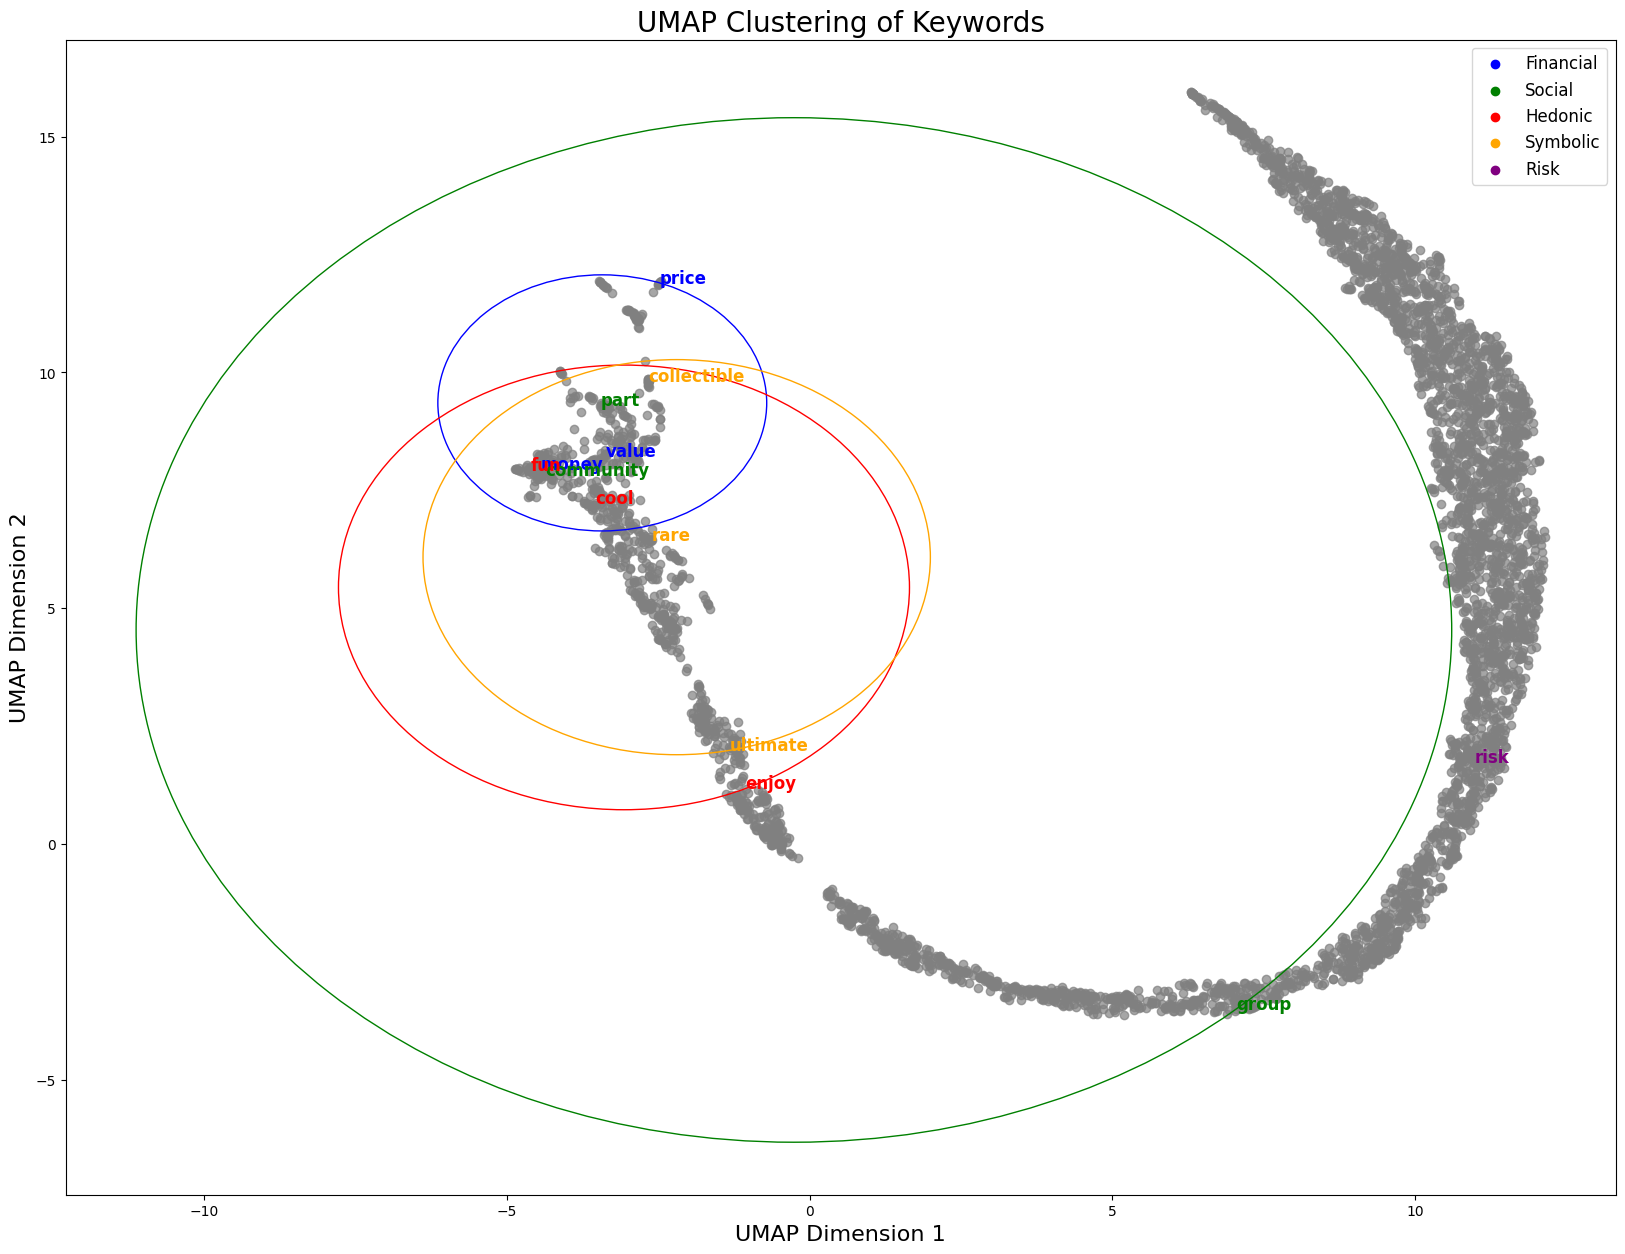

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# Define keyword clusters and their respective colors
keyword_clusters = {
    'Financial': {'keywords': ['price', 'money', 'value'], 'color': 'blue'},
    'Social': {'keywords': ['community', 'group', 'part'], 'color': 'green'},
    'Hedonic': {'keywords': ['fun', 'enjoy', 'cool'], 'color': 'red'},
    'Symbolic': {'keywords': ['ultimate', 'rare', 'collectible'], 'color': 'orange'},
    'Risk': {'keywords': ['risk', 'volatile', 'uncertain'], 'color': 'purple'},
}

# Plot the UMAP scatterplot
fig = plt.figure()
fig.set_size_inches(20, 15)
ax = fig.add_subplot(1, 1, 1)
ax.scatter(df[0], df[1], alpha=0.7, color='gray')  # Background scatterplot

# Annotate keywords based on their cluster and collect points for circles
cluster_points = {cluster: [] for cluster in keyword_clusters}
for i, txt in enumerate(X_l):
    for cluster, details in keyword_clusters.items():
        if txt in details['keywords']:
            ax.annotate(
                txt,
                (df.loc[i][0], df.loc[i][1]),
                color=details['color'],
                fontsize=12,
                weight='bold'
            )
            cluster_points[cluster].append((df.loc[i][0], df.loc[i][1]))

# Draw circles around clusters with solid lines and thinner width (excluding Risk cluster)
for cluster, points in cluster_points.items():
    if points and cluster != "Risk":
        points = np.array(points)
        center = points.mean(axis=0)
        radius = np.linalg.norm(points - center, axis=1).max()
        circle = plt.Circle(center, radius, color=keyword_clusters[cluster]['color'], fill=False, linestyle='-', linewidth=1)
        ax.add_patch(circle)

# Add title and labels for clarity
ax.set_title('UMAP Clustering of Keywords', fontsize=20)
ax.set_xlabel('UMAP Dimension 1', fontsize=16)
ax.set_ylabel('UMAP Dimension 2', fontsize=16)

# Create a legend for the clusters
for cluster, details in keyword_clusters.items():
    ax.scatter([], [], color=details['color'], label=cluster)

ax.legend(fontsize=12)

plt.show()

##5. VADER Sentiment Analysis

In [ ]:
nltk.download('vader_lexicon')

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
#Create an instance of the SentimentIntensityAnalyzer class and define a function to calculate the sentiment score:
sia = SentimentIntensityAnalyzer()

def get_vader_sentiment_score(text):
    sentiment = sia.polarity_scores(text)
    return sentiment

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Data/NFT/NBATS201001_230218.csv")

# Apply the VADER sentiment analysis function to the 'text' column
df['sentiment_score'] = df['text'].apply(get_vader_sentiment_score)

# Create a new column to store the compound sentiment scores
df['compound_score'] = df['sentiment_score'].apply(lambda x: x['compound'])

# Calculate the average compound score
average_compound_score = df['compound_score'].mean()

print("Average Compound Score:", average_compound_score)


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Average Compound Score: 0.21945827868852463


## 5. Word2Vec


In [ ]:
data_ready

In [ ]:
# Create CBOW model
model1 = gensim.models.Word2Vec(data_ready, min_count = 1, vector_size = 10, window = 5)

# Print results
print("Cosine similarity between 'community' " +
               "and 'fan' - CBOW : ",
    model1.wv.similarity('community', 'fan'))

print("Cosine similarity between 'price' " +
               "and 'rare' - CBOW : ",
    model1.wv.similarity('price', 'rare'))

print("Cosine similarity between 'legendary' " +
               "and 'rare' - CBOW : ",
    model1.wv.similarity('legendary', 'rare'))

print("Cosine similarity between 'happy' " +
                 "and 'legendary' - CBOW : ",
      model1.wv.similarity('happy', 'legendary'))

print("Cosine similarity between 'happy' " +
                 "and 'collection' - CBOW : ",
      model1.wv.similarity('happy', 'collection'))

print("Cosine similarity between 'identity' " +
                 "and 'collection' - CBOW : ",
      model1.wv.similarity('identity', 'collection'))


print("Cosine similarity between 'risk' " +
                 "and 'crypto' - CBOW : ",
      model1.wv.similarity('risk', 'crypto'))

# Create Skip Gram model
model2 = gensim.models.Word2Vec(data_ready, min_count = 1, vector_size = 100,
                                             window = 5, sg = 1)

# Print results
print("Cosine similarity between 'community' " +
               "and 'fan' - Skip Gram : ",
    model2.wv.similarity('community', 'fan'))

print("Cosine similarity between 'price' " +
          "and 'rare' - Skip Gram : ",
    model2.wv.similarity('price', 'rare'))

print("Cosine similarity between 'legendary' " +
               "and 'rare' - Skip Gram : ",
    model2.wv.similarity('legendary', 'rare'))

print("Cosine similarity between 'happy' " +
                 "and 'legendary' - Skip Gram : ",
      model2.wv.similarity('happy', 'legendary'))

print("Cosine similarity between 'happy' " +
                 "and 'collection' - Skip Gram : ",
      model2.wv.similarity('happy', 'collection'))

print("Cosine similarity between 'identity' " +
                 "and 'collection' - Skip Gram : ",
      model2.wv.similarity('identity', 'collection'))

print("Cosine similarity between 'risk' " +
                 "and 'crypto' - Skip Gram : ",
    model2.wv.similarity('risk', 'crypto'))


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Cosine similarity between 'community' and 'fan' - CBOW :  0.998999
Cosine similarity between 'price' and 'rare' - CBOW :  0.99732715
Cosine similarity between 'legendary' and 'rare' - CBOW :  0.9958737
Cosine similarity between 'happy' and 'legendary' - CBOW :  0.98962224
Cosine similarity between 'happy' and 'collection' - CBOW :  0.987081
Cosine similarity between 'identity' and 'collection' - CBOW :  0.8748276
Cosine similarity between 'risk' and 'crypto' - CBOW :  0.8744177
Cosine similarity between 'community' and 'fan' - Skip Gram :  0.99585193
Cosine similarity between 'price' and 'rare' - Skip Gram :  0.9888611
Cosine similarity between 'legendary' and 'rare' - Skip Gram :  0.9962647
Cosine similarity between 'happy' and 'legendary' - Skip Gram :  0.98728186
Cosine similarity between 'happy' and 'collection' - Skip Gram :  0.9920205
Cosine similarity between 'identity' and 'collection' - Skip Gram :  0.9974285
Cosine similarity between 'risk' and 'crypto' - Skip Gram :  0.99790

In [ ]:
model2.save("/content/drive/MyDrive/NFT/skip_gram_w2v.model")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
model = Word2Vec.load("/content/drive/MyDrive/NFT/skip_gram_w2v.model")
reducer = UMAP(n_neighbors = 5, n_components = 2, verbose = True)

X = model.wv[model.wv.index_to_key]
X_l = model.wv.index_to_key

cluster_embedding = reducer.fit_transform(X)
df = pd.DataFrame(cluster_embedding)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


UMAP(n_neighbors=5, verbose=True)
Fri May 12 01:35:46 2023 Construct fuzzy simplicial set
Fri May 12 01:35:46 2023 Finding Nearest Neighbors
Fri May 12 01:35:46 2023 Building RP forest with 9 trees
Fri May 12 01:36:08 2023 NN descent for 13 iterations
	 1  /  13
	 2  /  13
	 3  /  13
	 4  /  13
	 5  /  13
	 6  /  13
	 7  /  13
	Stopping threshold met -- exiting after 7 iterations
Fri May 12 01:36:34 2023 Finished Nearest Neighbor Search
Fri May 12 01:36:38 2023 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

Fri May 12 01:36:46 2023 Finished embedding


In [ ]:
fig = plt.figure()
fig.set_size_inches(50,30)
ax = fig.add_subplot(1,1,1)
ax.scatter(df[0], df[1])

for i, txt in enumerate(X_l) :
  if txt == 'cool' :
    ax.annotate(txt, (df.loc[i][0], df.loc[i][1]), color = 'red', fontsize = 30)

  if txt == 'money' :
    ax.annotate(txt, (df.loc[i][0], df.loc[i][1]), color = 'blue', fontsize = 30)

  if txt == 'lengendary' :
    ax.annotate(txt, (df.loc[i][0], df.loc[i][1]), color = 'green', fontsize = 30)

NameError: ignored

## 2. EDA(Explanatory Data Analysis)




*   Word Frequency distribution plot
*   List item



In [ ]:
#@title Examine vocab and Frequency distribution

all_words = [word for tokens in df['tokenize_text'] for word in tokens]
tweet_lengths = [len(tokens) for tokens in df['tokenize_text']]
vocab = sorted(list(set(all_words)))

print('{} words total, with a vocabulary size of {}'.format(len(all_words), len(vocab)))
print('Max tweet length is {}'.format(max(tweet_lengths)))

#make only token lists
flat_words = [item for sublist in df['tokenize_text'] for item in sublist]
word_freq = FreqDist(flat_words)

word_freq.most_common(30)


In [ ]:
word_freq_dict = dict(word_freq)

In [ ]:
sorted_word_freq_dict = dict(sorted(word_freq_dict.items(), key = lambda item: item[1], reverse = True))
x_axis = list(sorted_word_freq_dict.keys())
y_axis = list(sorted_word_freq_dict.values())

In [ ]:
plt.plot(x_axis, y_axis)

##Junk

In [ ]:
# access vector for one word
print(w2v['price'])

#[-0.04609262 -0.04943436 -0.08968851 -0.08428907  0.01970964]

#list the vocabulary words
words = list(w2v.wv.vocab)

print(words)

#or show the dictionary of vocab words
w2v.wv.vocab

In [ ]:
X = w2v[w2v.wv.vocab]
pca = PCA(n_components=2)

result = pca.fit_transform(X)

# create a scatter plot of the projection
plt.scatter(result[:, 0], result[:, 1])
words = list(w2v.wv.vocab)

for i, word in enumerate(words):
   plt.annotate(word, xy=(result[i, 0], result[i, 1]))

plt.show()

In [ ]:
#removing unwanted columns for this analysis
df.drop(columns = ['id', 'created_at', 'author_id','in_reply_to_user_id', 'lang', 'author', 'entities', 'referenced_tweets', 'media', 'geo'], inplace = True)



In [ ]:
#remove urls from text first
def remove_urls(text):
    return re.sub(r'http\S+','', text)

df['text'] = df['text'].apply(remove_urls)

In [ ]:
stop_words = stopwords.words('english')
new_words=('0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'https', 't.co', 'rt', 't', 'retw', 'retweet',
               'nft', 'nfts', 'hday', 'still', 'nbatopshot', 'chasegeer', 'le')
for i in new_words:
    stop_words.append(i)
print(stop_words)

In [ ]:
#add punctuation char's to stopwords list
stop_words += list(string.punctuation)

In [ ]:
#stop_words
def process_text(text):
    tokens = word_tokenize(text)
    stopwords_removed = [token.lower() for token in tokens if token.lower() not in stop_words]
    return stopwords_removed

df['text'] = df['text'].apply(process_text)

In [ ]:
test = list(df['text'][15:20])
test[2]

In [ ]:
list(filter(lambda x: x.isalpha(), test[2]))


In [ ]:
def remove_nums(text_object):
    no_nums = list(filter(lambda x: x.isalpha(), text_object))
    return no_nums

df['text'] = df['text'].apply(remove_nums)

In [ ]:
df['text'].head()


In [ ]:
#Lemmatize
lemmatizer = WordNetLemmatizer()

def lemmatize_text(df_text):
    lemmatized =[]
    for w in df_text:
        lemmatized.append(lemmatizer.lemmatize(w))
    return lemmatized

df['text'] = df['text'].apply(lemmatize_text)


In [ ]:
testers = list(df['text'][15:20])


In [ ]:
other_tester = list(df['text'][1000])

In [ ]:
print(other_tester)


In [ ]:
print(testers)


In [ ]:
#Examine Vocab and Frequency Distributions
all_words = [word for tokens in df['text'] for word in tokens]
tweet_lengths = [len(tokens) for tokens in df['text']]
vocab = sorted(list(set(all_words)))

print('{} words total, with a vocabulary size of {}'.format(len(all_words), len(vocab)))
print('Max tweet length is {}'.format(max(tweet_lengths)))

In [ ]:
flat_words = [item for sublist in df['text'] for item in sublist]


In [ ]:
word_freq = FreqDist(flat_words)


In [ ]:
word_freq.most_common(30)


In [ ]:
#preprocess steps as one function
lemmatizer = WordNetLemmatizer()

def preprocess(df_text):
    tokens = word_tokenize(df_text)
    stopwords_removed = [token.lower() for token in tokens if token.lower() not in stop_words and len(token) > 3]

    lemmatized =[]

    for w in stopwords_removed:
        lemmatized.append(lemmatizer.lemmatize(w))

    processed = list(filter(lambda x: x.isalpha(), lemmatized))

    return processed

In [ ]:
all_words = [word for tokens in df['text'] for word in tokens]
tweet_lengths = [len(tokens) for tokens in df['text']]
vocab = sorted(list(set(all_words)))

print('{} words total, with a vocabulary size of {}'.format(len(all_words), len(vocab)))
print('Max tweet length is {}'.format(max(tweet_lengths)))

In [ ]:
from nltk.probability import FreqDist

#iterate through each tweet, then each token in each tweet, and store in one list
flat_words = [item for sublist in df['text'] for item in sublist]

word_freq = FreqDist(flat_words)

word_freq.most_common(30)

In [ ]:
#retrieve word and count from FreqDist tuples

most_common_count = [x[1] for x in word_freq.most_common(30)]
most_common_word = [x[0] for x in word_freq.most_common(30)]

#create dictionary mapping of word count
top_30_dictionary = dict(zip(most_common_word, most_common_count))

In [ ]:
top_30_dictionary

In [ ]:
api_key = "yIBBjGJ9jfNUvZh8UTyJuu7KN"
api_key_secret = "NQWgR6N6hWaFFysGIquiGHISwWohvo3NOHktUzYwle6EeJtlYL"
access_key= "1590044677817786369-ftADUBJJKlNiIhYMMFLRuSmMQtIboZ"
access_key_secret = "pKWO5eu3s9pIle61yNFCADXpQ4M2elhKWxqMmHSUaYGgx"

auth = tweepy.OAuthHandler(api_key, api_key_secret)
auth.set_access_token(access_key, access_key_secret)

api = tweepy.API(auth,wait_on_rate_limit=True)

csvFile = open('file-name', 'a')
csvWriter = csv.writer(csvFile)

search_words = NBAtopshot or collect or buy
new_search = search_words + -filter:retweet

for tweet in tweepy.Cursor(api.search,q=new_search,count=100,
                           lang="en",
                           since_id=0).items():
    csvWriter.writerow([tweet.created_at, tweet.text.encode('utf-8'),tweet.user.screen_name.encode('utf-8'), tweet.user.location.encode('utf-8')])
